In [1]:
import sys
import pandas as pd


# import custom modules
sys.path.append('../../utils/')
import data_paths
import traffic_counts
from itertools import product
from pandas.tseries.offsets import YearEnd


In [2]:
from IPython.display import display

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [3]:
_counts = traffic_counts.TrafficCounts()
vehicle_share_counts = _counts.vehicle_shares
annual_cycles_counts = _counts.annual_cycles

In [4]:
_counts.annual_cycles

road_type                   date      
Access-residential          2019-04-12    0.973899
                            2019-04-13    0.524732
                            2019-04-15    0.816751
                            2019-04-16    1.078515
                            2019-04-17    1.036367
                                            ...   
TrunkRoad/Primary-National  2022-12-27    0.627529
                            2022-12-28    0.626349
                            2022-12-29    0.635865
                            2022-12-30    0.638028
                            2022-12-31    0.425330
Name: daily_value, Length: 7041, dtype: float64

                     road_type  daily_value
date                                       
2019-01-01  Access-residential     0.566286
2019-01-02  Access-residential     0.566286
2019-01-03  Access-residential     0.566286
2019-01-04  Access-residential     0.566286
2019-01-05  Access-residential     0.566286
...                        ...          ...
2022-12-27  Access-residential     0.391366
2022-12-28  Access-residential     0.361562
2022-12-29  Access-residential     0.404161
2022-12-30  Access-residential     0.438029
2022-12-31  Access-residential     0.309631

[1461 rows x 2 columns]


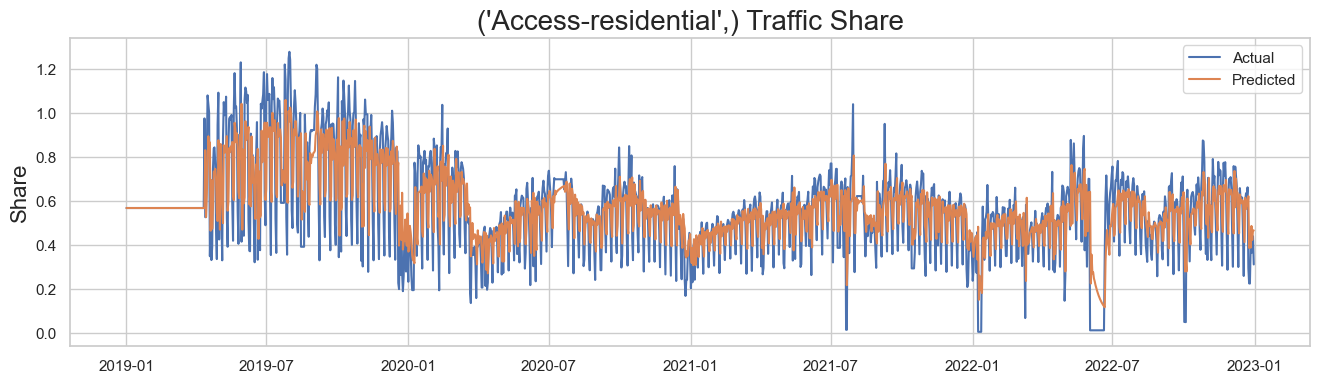

                  road_type  daily_value
date                                    
2019-01-01  Local/Collector     0.779191
2019-01-02  Local/Collector     0.009283
2019-01-03  Local/Collector     0.749901
2019-01-04  Local/Collector     0.739115
2019-01-05  Local/Collector     0.542371
...                     ...          ...
2022-12-27  Local/Collector     0.632380
2022-12-28  Local/Collector     0.657632
2022-12-29  Local/Collector     0.674049
2022-12-30  Local/Collector     0.674679
2022-12-31  Local/Collector     0.499546

[1461 rows x 2 columns]


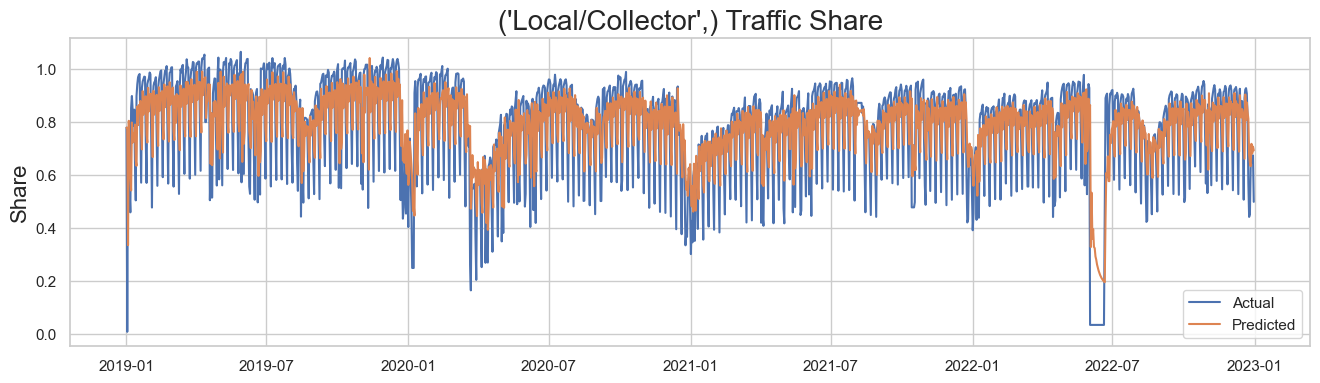

               road_type  daily_value
date                                 
2019-01-01  Motorway-Nat     0.495179
2019-01-02  Motorway-Nat     0.798286
2019-01-03  Motorway-Nat     0.789150
2019-01-04  Motorway-Nat     0.751387
2019-01-05  Motorway-Nat     0.564510
...                  ...          ...
2022-12-27  Motorway-Nat     0.759499
2022-12-28  Motorway-Nat     0.753726
2022-12-29  Motorway-Nat     0.735191
2022-12-30  Motorway-Nat     0.785042
2022-12-31  Motorway-Nat     0.507381

[1461 rows x 2 columns]


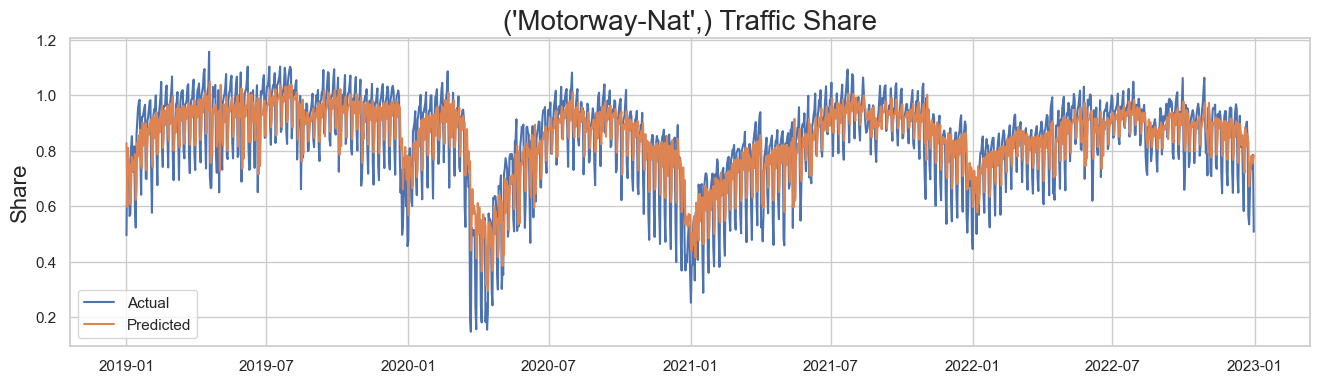

                         road_type  daily_value
date                                           
2019-01-01  TrunkRoad/Primary-City     0.851743
2019-01-02  TrunkRoad/Primary-City     0.013231
2019-01-03  TrunkRoad/Primary-City     0.825763
2019-01-04  TrunkRoad/Primary-City     0.839747
2019-01-05  TrunkRoad/Primary-City     0.630158
...                            ...          ...
2022-12-27  TrunkRoad/Primary-City     0.712674
2022-12-28  TrunkRoad/Primary-City     0.745415
2022-12-29  TrunkRoad/Primary-City     0.751100
2022-12-30  TrunkRoad/Primary-City     0.771132
2022-12-31  TrunkRoad/Primary-City     0.559057

[1461 rows x 2 columns]


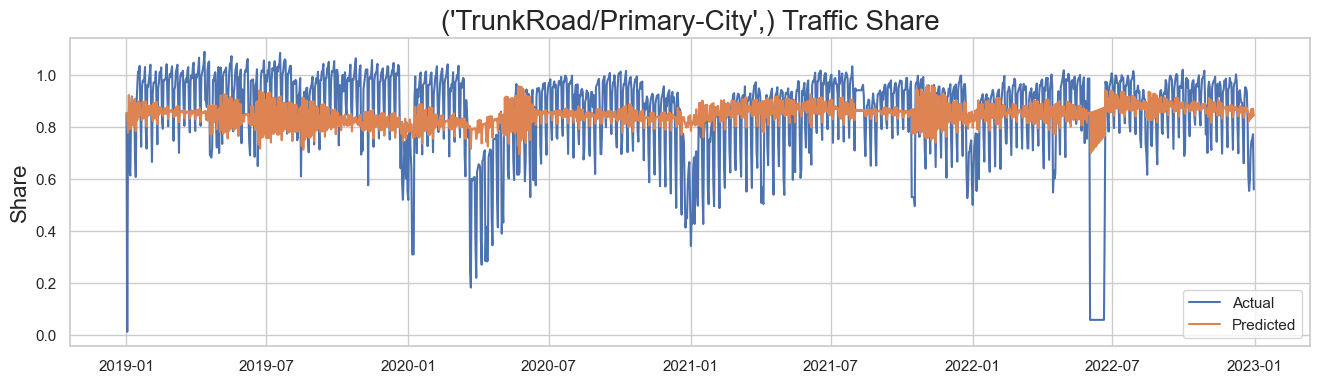

                             road_type  daily_value
date                                               
2019-01-01  TrunkRoad/Primary-National     0.317485
2019-01-02  TrunkRoad/Primary-National     0.729082
2019-01-03  TrunkRoad/Primary-National     0.780988
2019-01-04  TrunkRoad/Primary-National     0.760136
2019-01-05  TrunkRoad/Primary-National     0.513660
...                                ...          ...
2022-12-27  TrunkRoad/Primary-National     0.627529
2022-12-28  TrunkRoad/Primary-National     0.626349
2022-12-29  TrunkRoad/Primary-National     0.635865
2022-12-30  TrunkRoad/Primary-National     0.638028
2022-12-31  TrunkRoad/Primary-National     0.425330

[1461 rows x 2 columns]


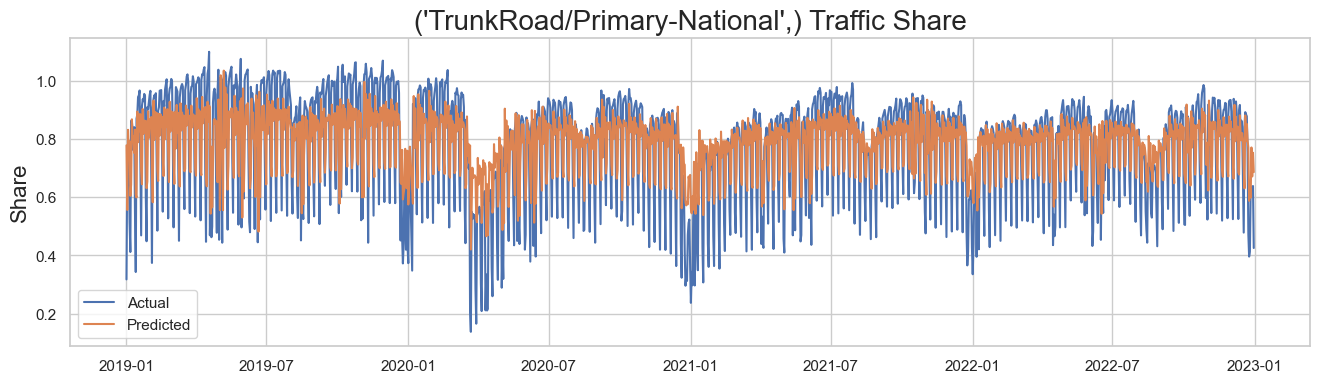

                     road_type vehicle_class         0
date                                                  
2019-01-01  Access-residential           MOT  0.041119
2019-01-02  Access-residential           MOT  0.041119
2019-01-03  Access-residential           MOT  0.041119
2019-01-04  Access-residential           MOT  0.041119
2019-01-05  Access-residential           MOT  0.041119
...                        ...           ...       ...
2022-12-27  Access-residential           MOT  0.012731
2022-12-28  Access-residential           MOT  0.015417
2022-12-29  Access-residential           MOT  0.015310
2022-12-30  Access-residential           MOT  0.013411
2022-12-31  Access-residential           MOT  0.035523

[1461 rows x 3 columns]


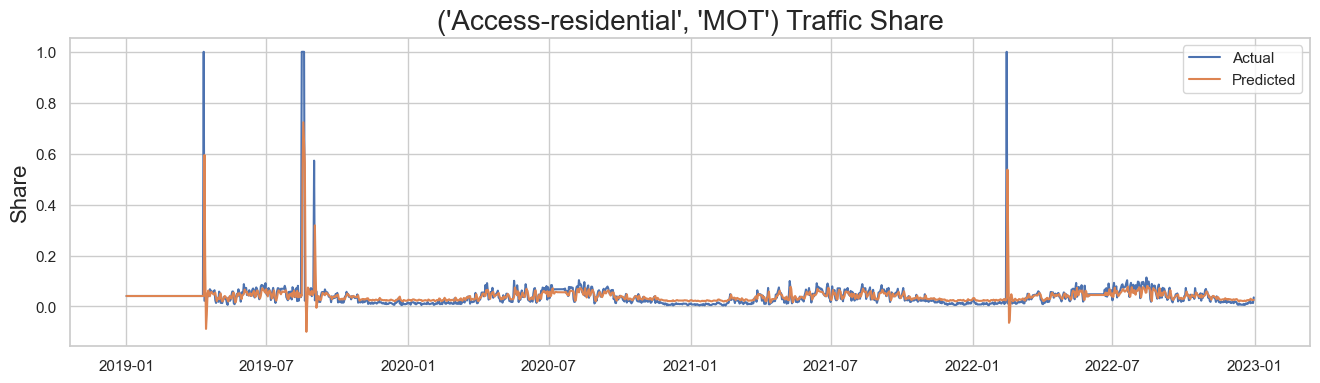

                     road_type vehicle_class         0
date                                                  
2019-01-01  Access-residential           HGV  0.007238
2019-01-02  Access-residential           HGV  0.007238
2019-01-03  Access-residential           HGV  0.007238
2019-01-04  Access-residential           HGV  0.007238
2019-01-05  Access-residential           HGV  0.007238
...                        ...           ...       ...
2022-12-27  Access-residential           HGV  0.002507
2022-12-28  Access-residential           HGV  0.002507
2022-12-29  Access-residential           HGV  0.002507
2022-12-30  Access-residential           HGV  0.002507
2022-12-31  Access-residential           HGV  0.002507

[1461 rows x 3 columns]


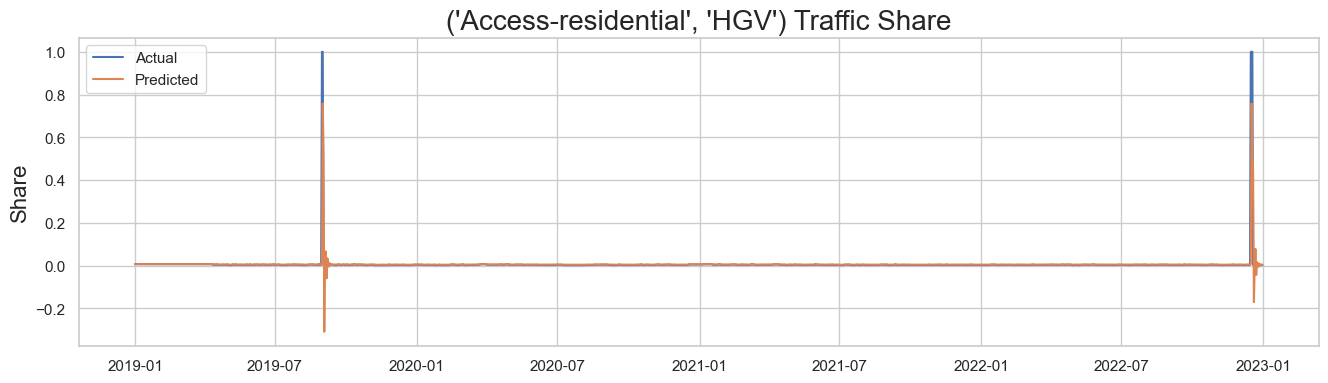

                     road_type vehicle_class         0
date                                                  
2019-01-01  Access-residential           LCV  0.072526
2019-01-02  Access-residential           LCV  0.072526
2019-01-03  Access-residential           LCV  0.072526
2019-01-04  Access-residential           LCV  0.072526
2019-01-05  Access-residential           LCV  0.072526
...                        ...           ...       ...
2022-12-27  Access-residential           LCV  0.064429
2022-12-28  Access-residential           LCV  0.056667
2022-12-29  Access-residential           LCV  0.052278
2022-12-30  Access-residential           LCV  0.048831
2022-12-31  Access-residential           LCV  0.043796

[1461 rows x 3 columns]


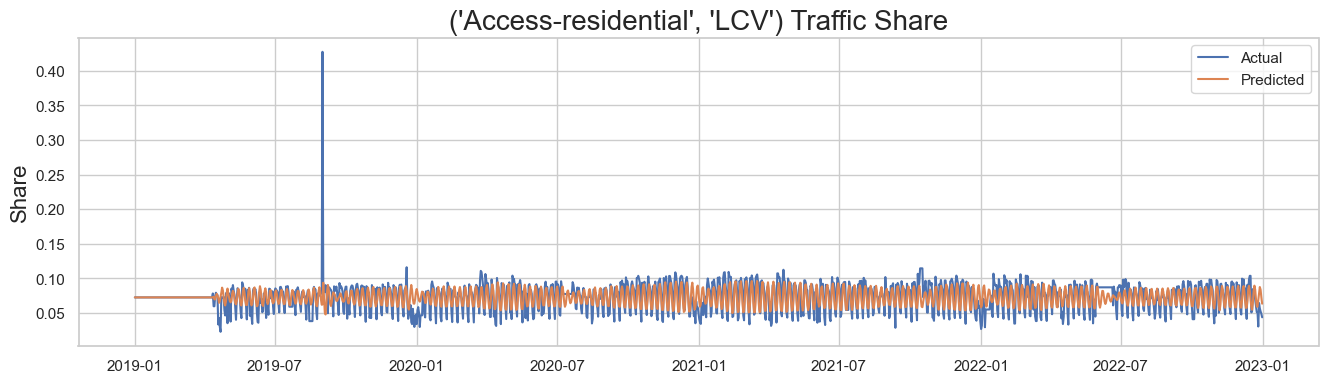

                     road_type vehicle_class         0
date                                                  
2019-01-01  Access-residential            PC  0.893378
2019-01-02  Access-residential            PC  0.893378
2019-01-03  Access-residential            PC  0.893378
2019-01-04  Access-residential            PC  0.893378
2019-01-05  Access-residential            PC  0.893378
...                        ...           ...       ...
2022-12-27  Access-residential            PC  0.922840
2022-12-28  Access-residential            PC  0.927917
2022-12-29  Access-residential            PC  0.932412
2022-12-30  Access-residential            PC  0.937758
2022-12-31  Access-residential            PC  0.920681

[1461 rows x 3 columns]


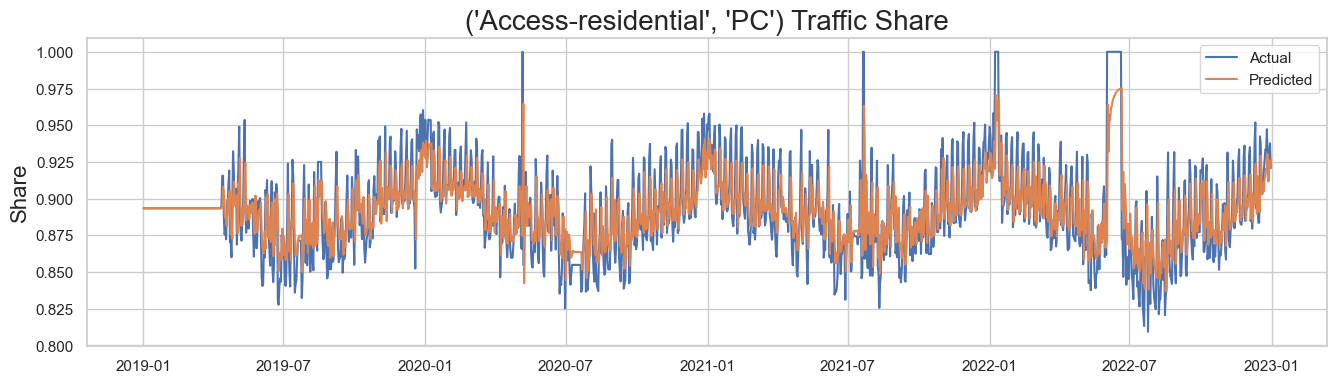

               road_type vehicle_class       date   0
5844  Access-residential           BUS 2019-01-01 NaN
5845  Access-residential           BUS 2019-01-02 NaN
5846  Access-residential           BUS 2019-01-03 NaN
5847  Access-residential           BUS 2019-01-04 NaN
5848  Access-residential           BUS 2019-01-05 NaN
...                  ...           ...        ...  ..
7300  Access-residential           BUS 2022-12-27 NaN
7301  Access-residential           BUS 2022-12-28 NaN
7302  Access-residential           BUS 2022-12-29 NaN
7303  Access-residential           BUS 2022-12-30 NaN
7304  Access-residential           BUS 2022-12-31 NaN

[1461 rows x 4 columns]


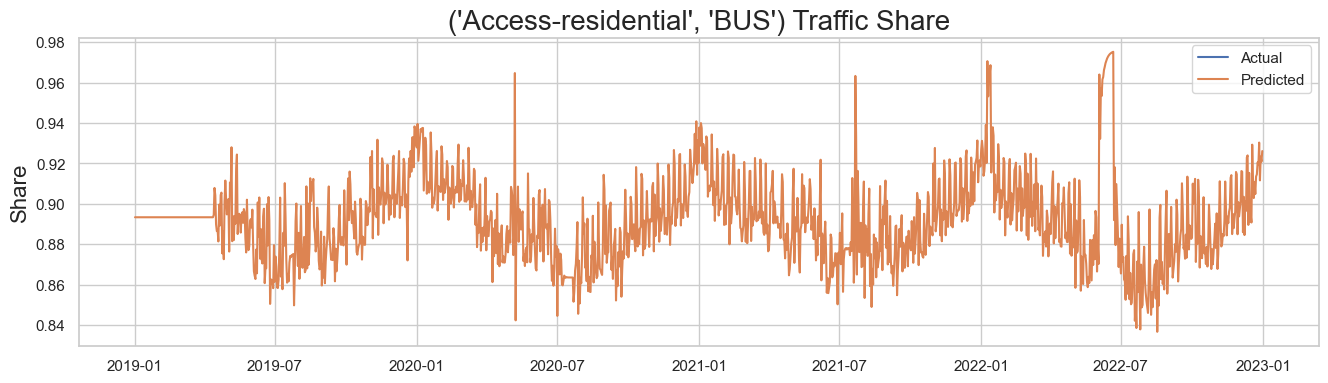

                  road_type vehicle_class         0
date                                               
2019-01-01  Local/Collector           MOT  0.015699
2019-01-02  Local/Collector           MOT  0.015699
2019-01-03  Local/Collector           MOT  0.002298
2019-01-04  Local/Collector           MOT  0.002465
2019-01-05  Local/Collector           MOT  0.009234
...                     ...           ...       ...
2022-12-27  Local/Collector           MOT  0.004437
2022-12-28  Local/Collector           MOT  0.004144
2022-12-29  Local/Collector           MOT  0.005267
2022-12-30  Local/Collector           MOT  0.005058
2022-12-31  Local/Collector           MOT  0.010565

[1461 rows x 3 columns]


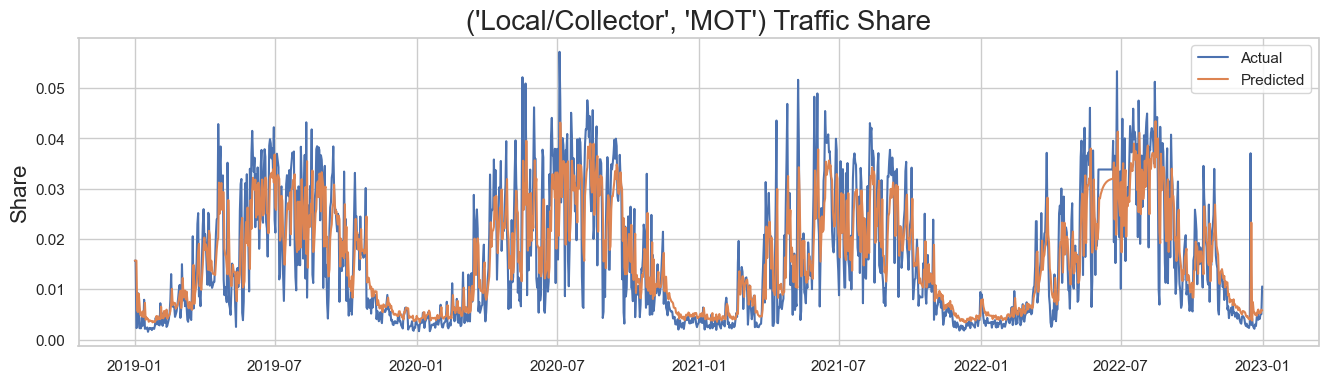

                  road_type vehicle_class         0
date                                               
2019-01-01  Local/Collector           HGV  0.023151
2019-01-02  Local/Collector           HGV  0.044610
2019-01-03  Local/Collector           HGV  0.021268
2019-01-04  Local/Collector           HGV  0.021190
2019-01-05  Local/Collector           HGV  0.014532
...                     ...           ...       ...
2022-12-27  Local/Collector           HGV  0.018135
2022-12-28  Local/Collector           HGV  0.018800
2022-12-29  Local/Collector           HGV  0.016489
2022-12-30  Local/Collector           HGV  0.015534
2022-12-31  Local/Collector           HGV  0.006190

[1461 rows x 3 columns]


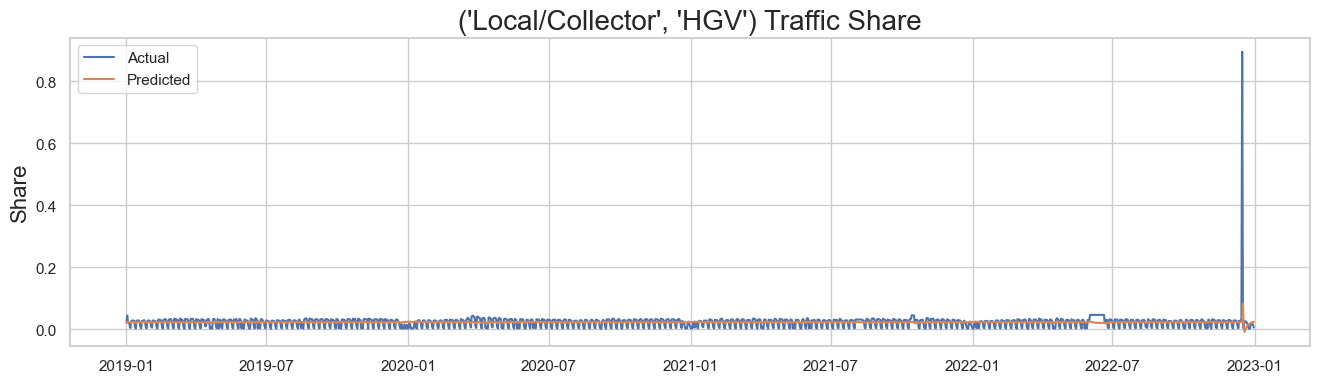

                  road_type vehicle_class         0
date                                               
2019-01-01  Local/Collector           LCV  0.091977
2019-01-02  Local/Collector           LCV  0.052045
2019-01-03  Local/Collector           LCV  0.073358
2019-01-04  Local/Collector           LCV  0.075923
2019-01-05  Local/Collector           LCV  0.066817
...                     ...           ...       ...
2022-12-27  Local/Collector           LCV  0.077153
2022-12-28  Local/Collector           LCV  0.080885
2022-12-29  Local/Collector           LCV  0.080056
2022-12-30  Local/Collector           LCV  0.073664
2022-12-31  Local/Collector           LCV  0.057526

[1461 rows x 3 columns]


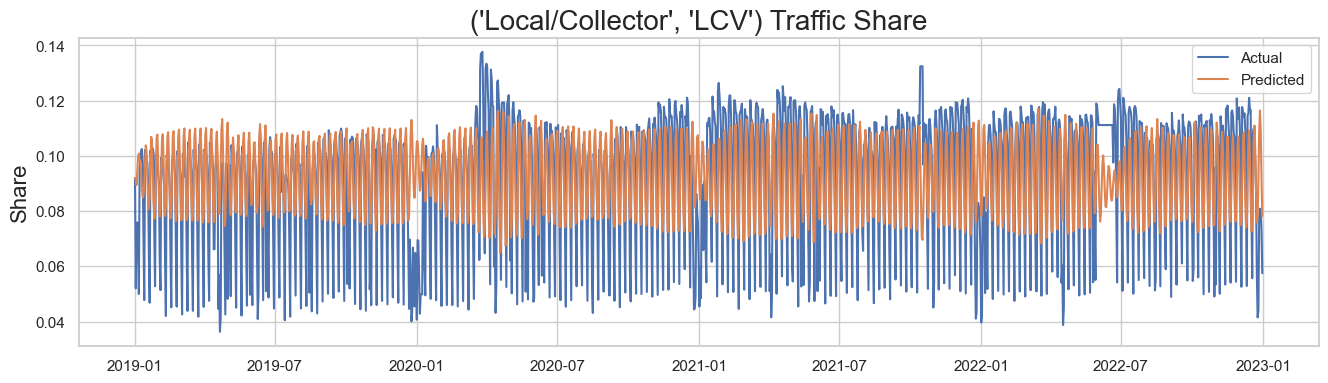

                  road_type vehicle_class         0
date                                               
2019-01-01  Local/Collector            PC  0.856143
2019-01-02  Local/Collector            PC  0.855019
2019-01-03  Local/Collector            PC  0.886965
2019-01-04  Local/Collector            PC  0.883793
2019-01-05  Local/Collector            PC  0.890755
...                     ...           ...       ...
2022-12-27  Local/Collector            PC  0.882069
2022-12-28  Local/Collector            PC  0.878433
2022-12-29  Local/Collector            PC  0.881568
2022-12-30  Local/Collector            PC  0.891097
2022-12-31  Local/Collector            PC  0.906358

[1461 rows x 3 columns]


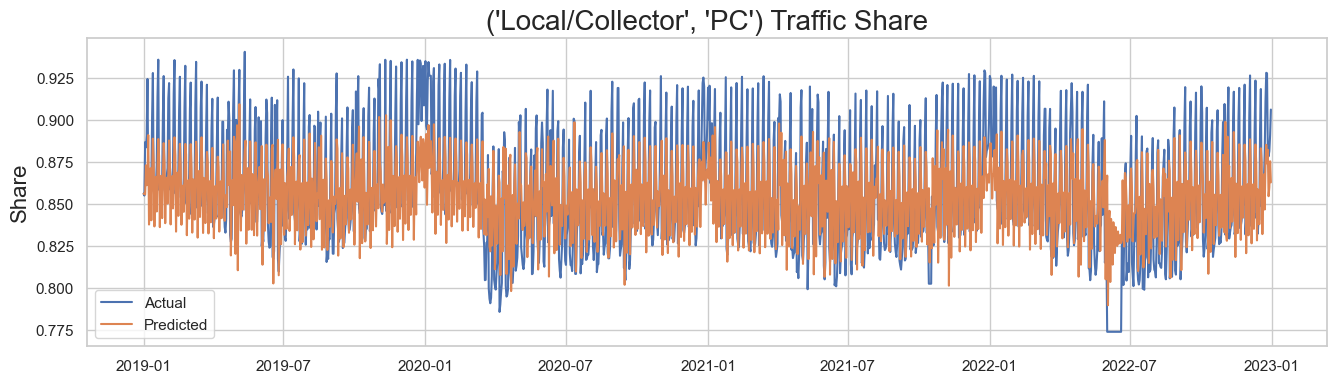

                  road_type vehicle_class         0
date                                               
2019-01-01  Local/Collector           BUS  0.013179
2019-01-02  Local/Collector           BUS  0.048327
2019-01-03  Local/Collector           BUS  0.016112
2019-01-04  Local/Collector           BUS  0.016629
2019-01-05  Local/Collector           BUS  0.018662
...                     ...           ...       ...
2022-12-27  Local/Collector           BUS  0.018206
2022-12-28  Local/Collector           BUS  0.017739
2022-12-29  Local/Collector           BUS  0.016620
2022-12-30  Local/Collector           BUS  0.014647
2022-12-31  Local/Collector           BUS  0.019361

[1461 rows x 3 columns]


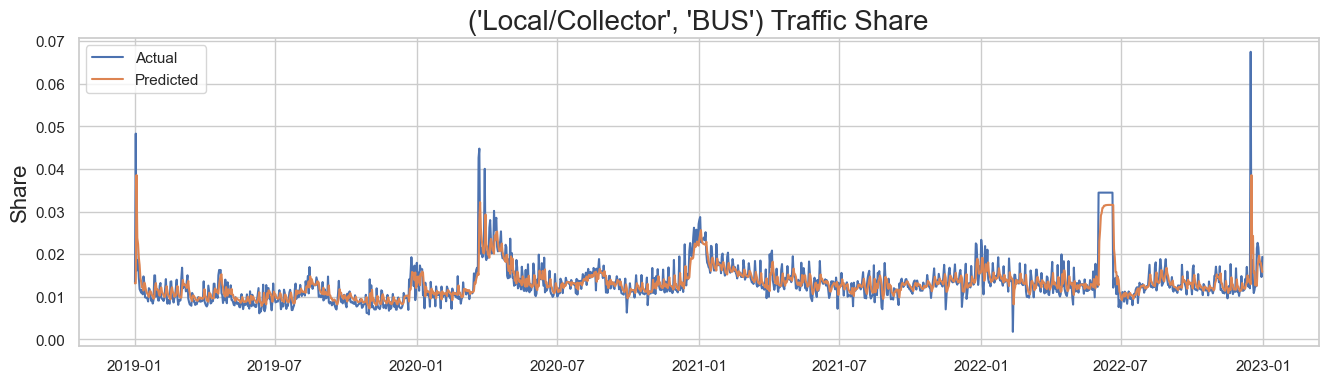

               road_type vehicle_class         0
date                                            
2019-01-01  Motorway-Nat           MOT  0.003937
2019-01-02  Motorway-Nat           MOT  0.001738
2019-01-03  Motorway-Nat           MOT  0.002171
2019-01-04  Motorway-Nat           MOT  0.002507
2019-01-05  Motorway-Nat           MOT  0.003029
...                  ...           ...       ...
2022-12-27  Motorway-Nat           MOT  0.000668
2022-12-28  Motorway-Nat           MOT  0.000801
2022-12-29  Motorway-Nat           MOT  0.001054
2022-12-30  Motorway-Nat           MOT  0.000685
2022-12-31  Motorway-Nat           MOT  0.001567

[1461 rows x 3 columns]


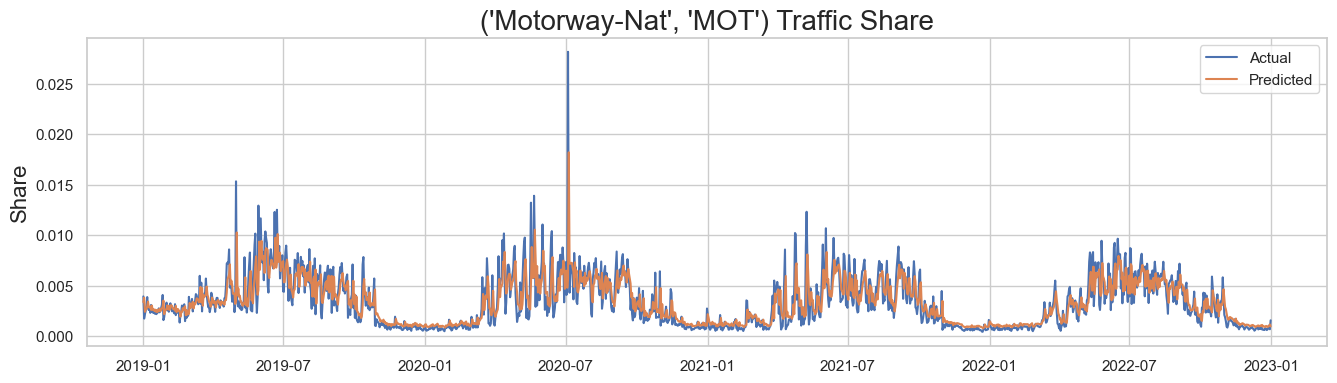

               road_type vehicle_class         0
date                                            
2019-01-01  Motorway-Nat           HGV  0.016978
2019-01-02  Motorway-Nat           HGV  0.081574
2019-01-03  Motorway-Nat           HGV  0.106976
2019-01-04  Motorway-Nat           HGV  0.114502
2019-01-05  Motorway-Nat           HGV  0.073965
...                  ...           ...       ...
2022-12-27  Motorway-Nat           HGV  0.055881
2022-12-28  Motorway-Nat           HGV  0.056761
2022-12-29  Motorway-Nat           HGV  0.058677
2022-12-30  Motorway-Nat           HGV  0.043605
2022-12-31  Motorway-Nat           HGV  0.020331

[1461 rows x 3 columns]


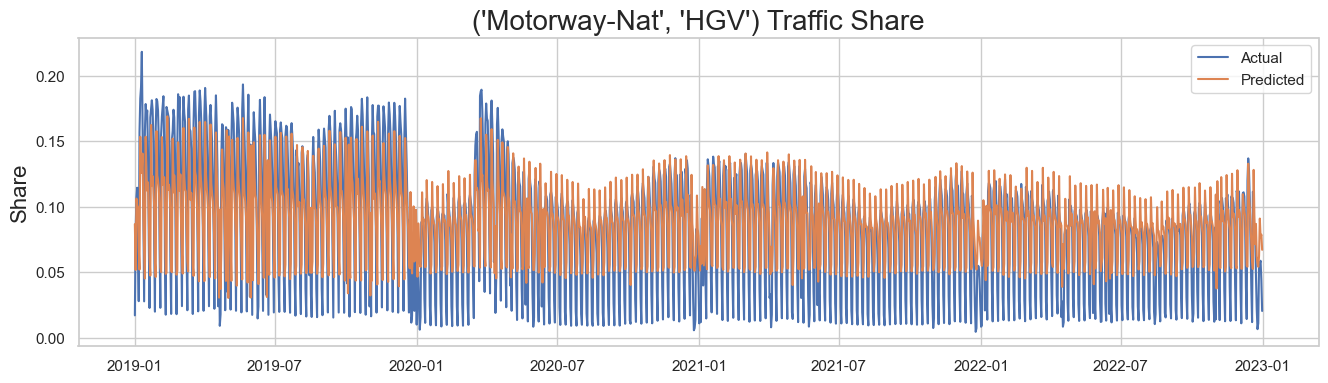

               road_type vehicle_class         0
date                                            
2019-01-01  Motorway-Nat           LCV  0.032234
2019-01-02  Motorway-Nat           LCV  0.053595
2019-01-03  Motorway-Nat           LCV  0.049592
2019-01-04  Motorway-Nat           LCV  0.059505
2019-01-05  Motorway-Nat           LCV  0.082808
...                  ...           ...       ...
2022-12-27  Motorway-Nat           LCV  0.084048
2022-12-28  Motorway-Nat           LCV  0.091331
2022-12-29  Motorway-Nat           LCV  0.094809
2022-12-30  Motorway-Nat           LCV  0.084419
2022-12-31  Motorway-Nat           LCV  0.073973

[1461 rows x 3 columns]


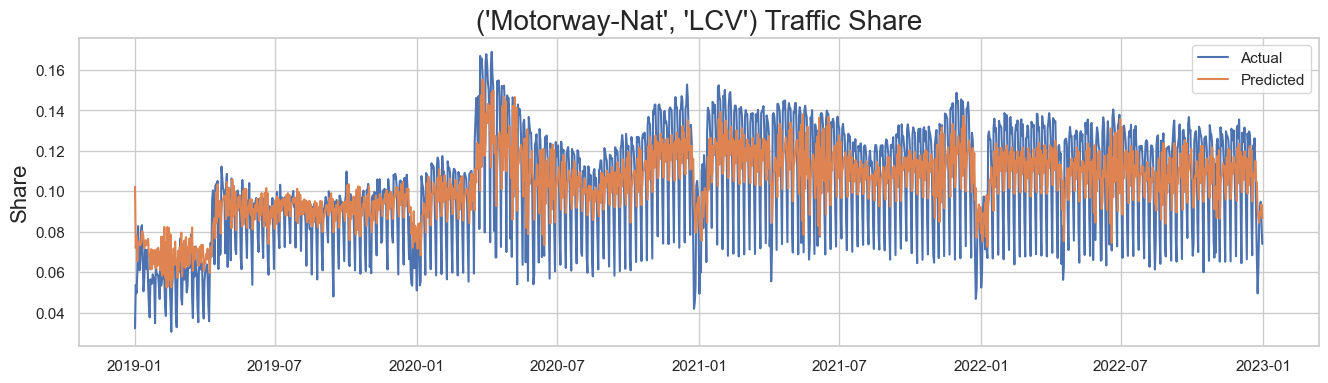

               road_type vehicle_class         0
date                                            
2019-01-01  Motorway-Nat            PC  0.943996
2019-01-02  Motorway-Nat            PC  0.858276
2019-01-03  Motorway-Nat            PC  0.837148
2019-01-04  Motorway-Nat            PC  0.818232
2019-01-05  Motorway-Nat            PC  0.834514
...                  ...           ...       ...
2022-12-27  Motorway-Nat            PC  0.856490
2022-12-28  Motorway-Nat            PC  0.847735
2022-12-29  Motorway-Nat            PC  0.841976
2022-12-30  Motorway-Nat            PC  0.868192
2022-12-31  Motorway-Nat            PC  0.900894

[1461 rows x 3 columns]


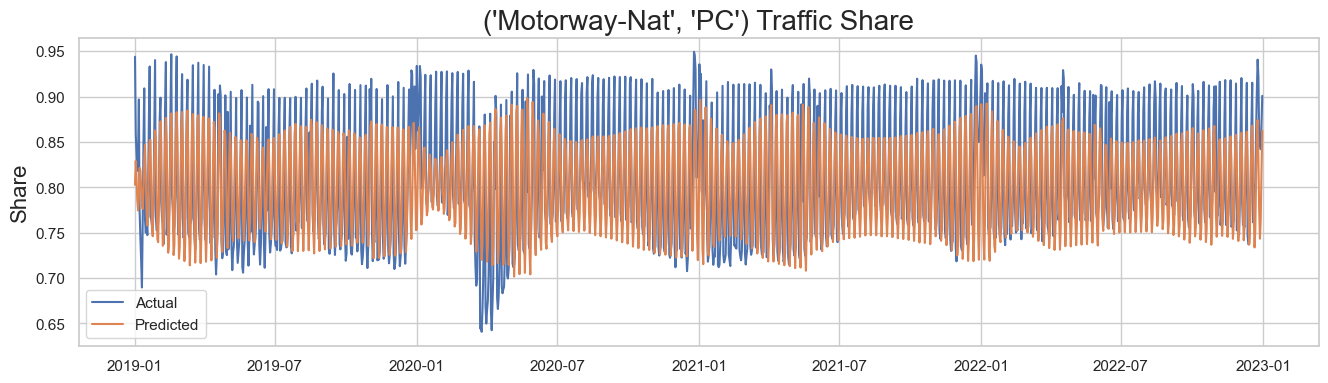

               road_type vehicle_class         0
date                                            
2019-01-01  Motorway-Nat           BUS  0.002854
2019-01-02  Motorway-Nat           BUS  0.004818
2019-01-03  Motorway-Nat           BUS  0.004112
2019-01-04  Motorway-Nat           BUS  0.005253
2019-01-05  Motorway-Nat           BUS  0.005684
...                  ...           ...       ...
2022-12-27  Motorway-Nat           BUS  0.002913
2022-12-28  Motorway-Nat           BUS  0.003371
2022-12-29  Motorway-Nat           BUS  0.003484
2022-12-30  Motorway-Nat           BUS  0.003100
2022-12-31  Motorway-Nat           BUS  0.003235

[1461 rows x 3 columns]


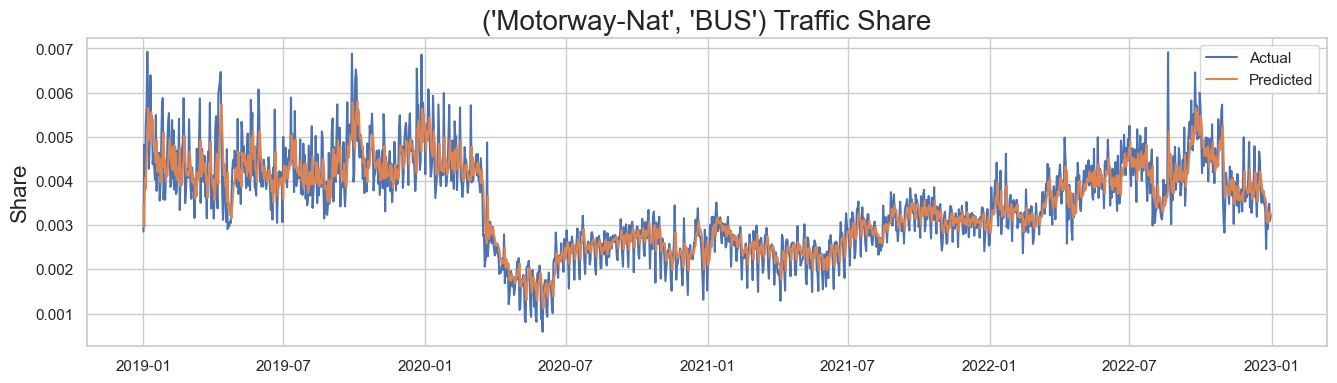

                         road_type vehicle_class         0
date                                                      
2019-01-01  TrunkRoad/Primary-City           MOT  0.007399
2019-01-02  TrunkRoad/Primary-City           MOT  0.007399
2019-01-03  TrunkRoad/Primary-City           MOT  0.001150
2019-01-04  TrunkRoad/Primary-City           MOT  0.001090
2019-01-05  TrunkRoad/Primary-City           MOT  0.001348
...                            ...           ...       ...
2022-12-27  TrunkRoad/Primary-City           MOT  0.001891
2022-12-28  TrunkRoad/Primary-City           MOT  0.002086
2022-12-29  TrunkRoad/Primary-City           MOT  0.002288
2022-12-30  TrunkRoad/Primary-City           MOT  0.001989
2022-12-31  TrunkRoad/Primary-City           MOT  0.004341

[1461 rows x 3 columns]


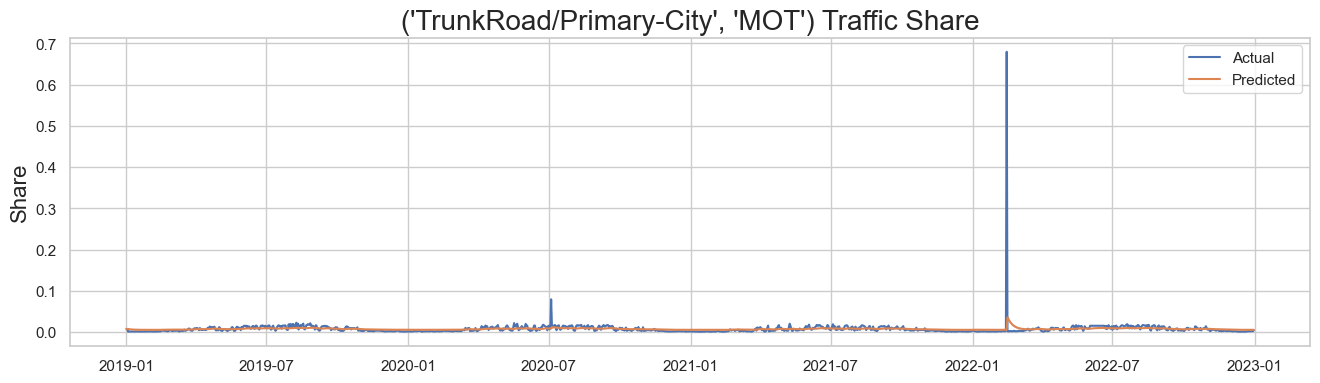

                         road_type vehicle_class         0
date                                                      
2019-01-01  TrunkRoad/Primary-City           HGV  0.036163
2019-01-02  TrunkRoad/Primary-City           HGV  0.030174
2019-01-03  TrunkRoad/Primary-City           HGV  0.038752
2019-01-04  TrunkRoad/Primary-City           HGV  0.036081
2019-01-05  TrunkRoad/Primary-City           HGV  0.018905
...                            ...           ...       ...
2022-12-27  TrunkRoad/Primary-City           HGV  0.033243
2022-12-28  TrunkRoad/Primary-City           HGV  0.032431
2022-12-29  TrunkRoad/Primary-City           HGV  0.031237
2022-12-30  TrunkRoad/Primary-City           HGV  0.026177
2022-12-31  TrunkRoad/Primary-City           HGV  0.010791

[1461 rows x 3 columns]


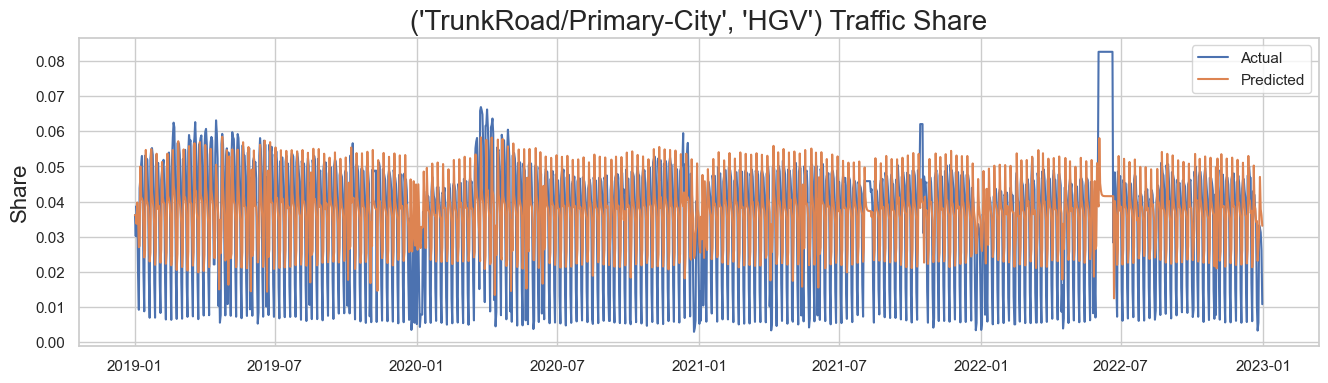

                         road_type vehicle_class         0
date                                                      
2019-01-01  TrunkRoad/Primary-City           LCV  0.095106
2019-01-02  TrunkRoad/Primary-City           LCV  0.071664
2019-01-03  TrunkRoad/Primary-City           LCV  0.073036
2019-01-04  TrunkRoad/Primary-City           LCV  0.073942
2019-01-05  TrunkRoad/Primary-City           LCV  0.073782
...                            ...           ...       ...
2022-12-27  TrunkRoad/Primary-City           LCV  0.084634
2022-12-28  TrunkRoad/Primary-City           LCV  0.085478
2022-12-29  TrunkRoad/Primary-City           LCV  0.085487
2022-12-30  TrunkRoad/Primary-City           LCV  0.082472
2022-12-31  TrunkRoad/Primary-City           LCV  0.064593

[1461 rows x 3 columns]


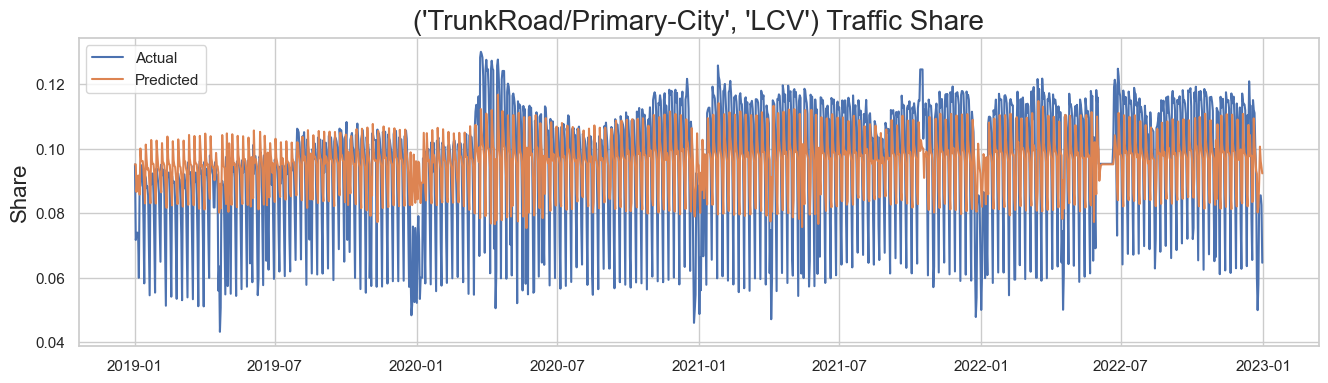

                         road_type vehicle_class         0
date                                                      
2019-01-01  TrunkRoad/Primary-City            PC  0.860238
2019-01-02  TrunkRoad/Primary-City            PC  0.880717
2019-01-03  TrunkRoad/Primary-City            PC  0.885225
2019-01-04  TrunkRoad/Primary-City            PC  0.887452
2019-01-05  TrunkRoad/Primary-City            PC  0.903679
...                            ...           ...       ...
2022-12-27  TrunkRoad/Primary-City            PC  0.878631
2022-12-28  TrunkRoad/Primary-City            PC  0.878280
2022-12-29  TrunkRoad/Primary-City            PC  0.879262
2022-12-30  TrunkRoad/Primary-City            PC  0.887921
2022-12-31  TrunkRoad/Primary-City            PC  0.918701

[1461 rows x 3 columns]


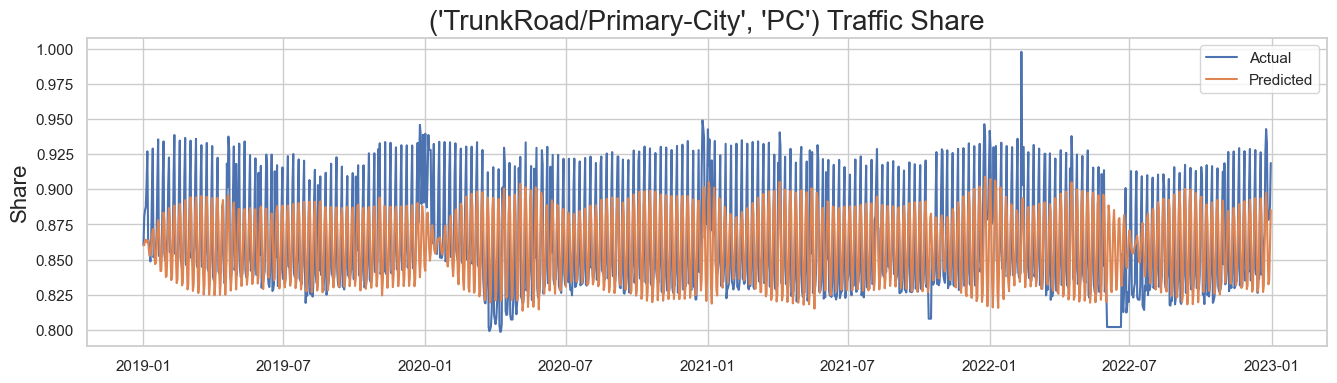

                         road_type vehicle_class         0
date                                                      
2019-01-01  TrunkRoad/Primary-City           BUS  0.001920
2019-01-02  TrunkRoad/Primary-City           BUS  0.017445
2019-01-03  TrunkRoad/Primary-City           BUS  0.001836
2019-01-04  TrunkRoad/Primary-City           BUS  0.001435
2019-01-05  TrunkRoad/Primary-City           BUS  0.002286
...                            ...           ...       ...
2022-12-27  TrunkRoad/Primary-City           BUS  0.001602
2022-12-28  TrunkRoad/Primary-City           BUS  0.001725
2022-12-29  TrunkRoad/Primary-City           BUS  0.001727
2022-12-30  TrunkRoad/Primary-City           BUS  0.001441
2022-12-31  TrunkRoad/Primary-City           BUS  0.001575

[1461 rows x 3 columns]


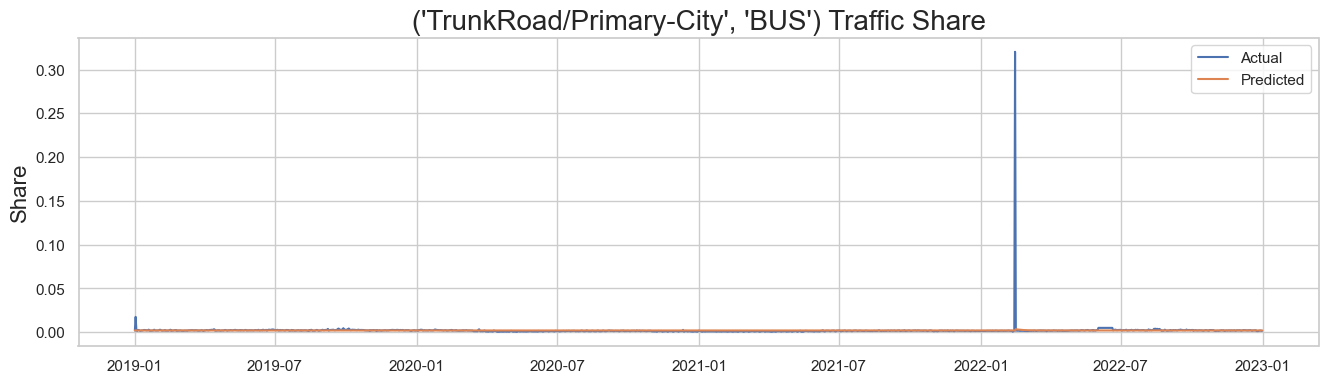

                             road_type vehicle_class         0
date                                                          
2019-01-01  TrunkRoad/Primary-National           MOT  0.010900
2019-01-02  TrunkRoad/Primary-National           MOT  0.005023
2019-01-03  TrunkRoad/Primary-National           MOT  0.001981
2019-01-04  TrunkRoad/Primary-National           MOT  0.001186
2019-01-05  TrunkRoad/Primary-National           MOT  0.004278
...                                ...           ...       ...
2022-12-27  TrunkRoad/Primary-National           MOT  0.001859
2022-12-28  TrunkRoad/Primary-National           MOT  0.001958
2022-12-29  TrunkRoad/Primary-National           MOT  0.002551
2022-12-30  TrunkRoad/Primary-National           MOT  0.002031
2022-12-31  TrunkRoad/Primary-National           MOT  0.008886

[1461 rows x 3 columns]


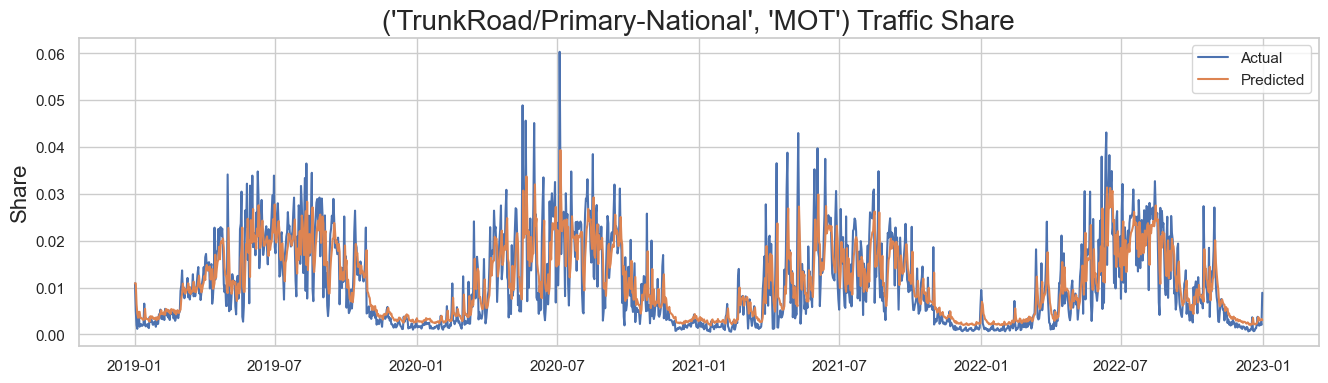

                             road_type vehicle_class         0
date                                                          
2019-01-01  TrunkRoad/Primary-National           HGV  0.005731
2019-01-02  TrunkRoad/Primary-National           HGV  0.043063
2019-01-03  TrunkRoad/Primary-National           HGV  0.057259
2019-01-04  TrunkRoad/Primary-National           HGV  0.054777
2019-01-05  TrunkRoad/Primary-National           HGV  0.035131
...                                ...           ...       ...
2022-12-27  TrunkRoad/Primary-National           HGV  0.040466
2022-12-28  TrunkRoad/Primary-National           HGV  0.040432
2022-12-29  TrunkRoad/Primary-National           HGV  0.039522
2022-12-30  TrunkRoad/Primary-National           HGV  0.032326
2022-12-31  TrunkRoad/Primary-National           HGV  0.011118

[1461 rows x 3 columns]


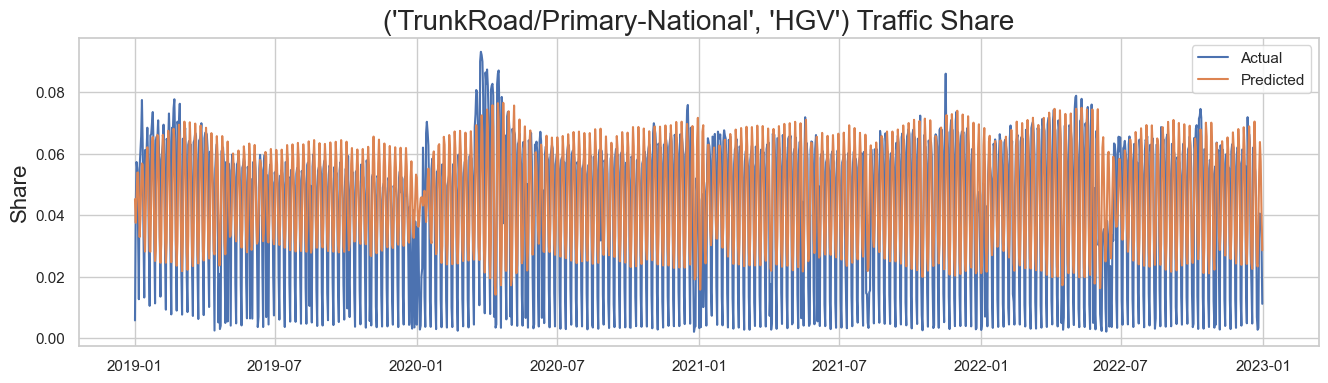

                             road_type vehicle_class         0
date                                                          
2019-01-01  TrunkRoad/Primary-National           LCV  0.047097
2019-01-02  TrunkRoad/Primary-National           LCV  0.099135
2019-01-03  TrunkRoad/Primary-National           LCV  0.094067
2019-01-04  TrunkRoad/Primary-National           LCV  0.091642
2019-01-05  TrunkRoad/Primary-National           LCV  0.082304
...                                ...           ...       ...
2022-12-27  TrunkRoad/Primary-National           LCV  0.092174
2022-12-28  TrunkRoad/Primary-National           LCV  0.095004
2022-12-29  TrunkRoad/Primary-National           LCV  0.095695
2022-12-30  TrunkRoad/Primary-National           LCV  0.091168
2022-12-31  TrunkRoad/Primary-National           LCV  0.068809

[1461 rows x 3 columns]


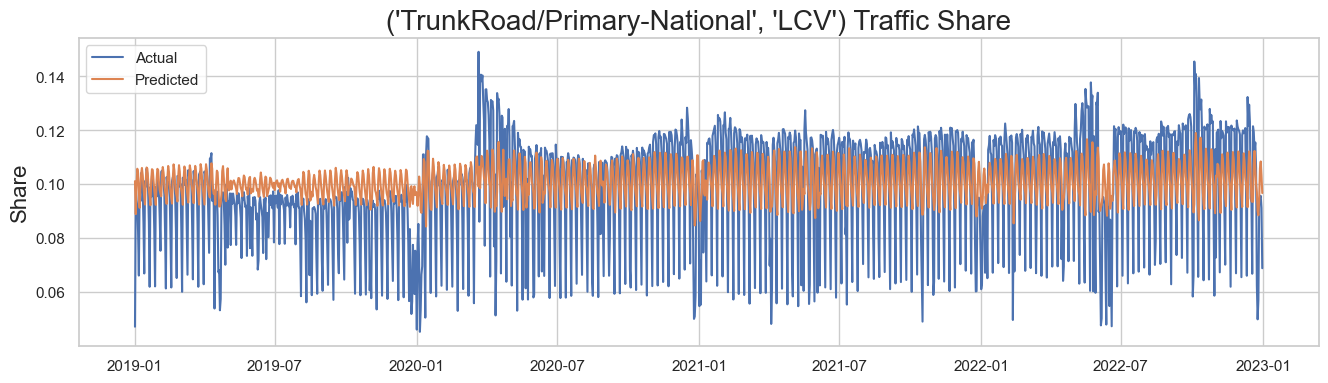

                             road_type vehicle_class         0
date                                                          
2019-01-01  TrunkRoad/Primary-National            PC  0.944306
2019-01-02  TrunkRoad/Primary-National            PC  0.842898
2019-01-03  TrunkRoad/Primary-National            PC  0.841717
2019-01-04  TrunkRoad/Primary-National            PC  0.846489
2019-01-05  TrunkRoad/Primary-National            PC  0.870485
...                                ...           ...       ...
2022-12-27  TrunkRoad/Primary-National            PC  0.857890
2022-12-28  TrunkRoad/Primary-National            PC  0.854773
2022-12-29  TrunkRoad/Primary-National            PC  0.855085
2022-12-30  TrunkRoad/Primary-National            PC  0.867056
2022-12-31  TrunkRoad/Primary-National            PC  0.906461

[1461 rows x 3 columns]


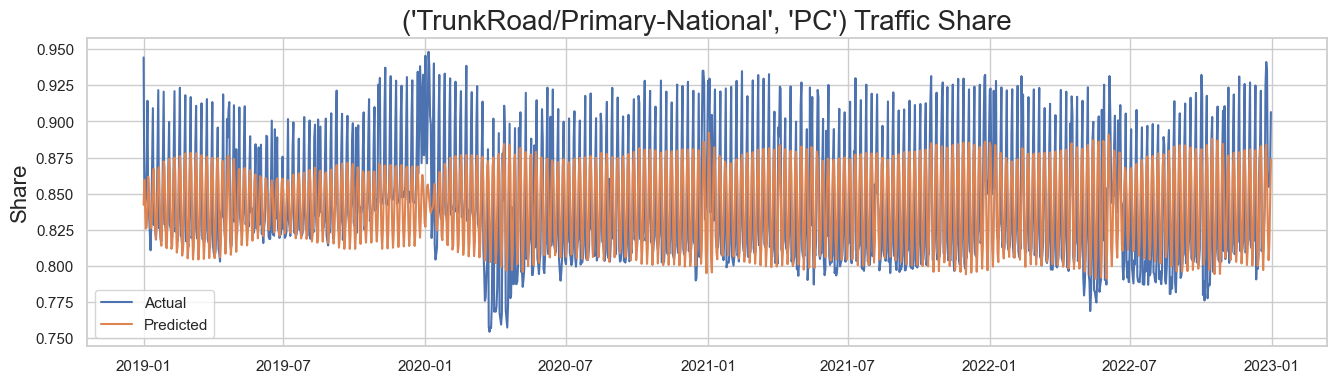

                             road_type vehicle_class         0
date                                                          
2019-01-01  TrunkRoad/Primary-National           BUS  0.002866
2019-01-02  TrunkRoad/Primary-National           BUS  0.009881
2019-01-03  TrunkRoad/Primary-National           BUS  0.004975
2019-01-04  TrunkRoad/Primary-National           BUS  0.005906
2019-01-05  TrunkRoad/Primary-National           BUS  0.007803
...                                ...           ...       ...
2022-12-27  TrunkRoad/Primary-National           BUS  0.007611
2022-12-28  TrunkRoad/Primary-National           BUS  0.007833
2022-12-29  TrunkRoad/Primary-National           BUS  0.007148
2022-12-30  TrunkRoad/Primary-National           BUS  0.007419
2022-12-31  TrunkRoad/Primary-National           BUS  0.004727

[1461 rows x 3 columns]


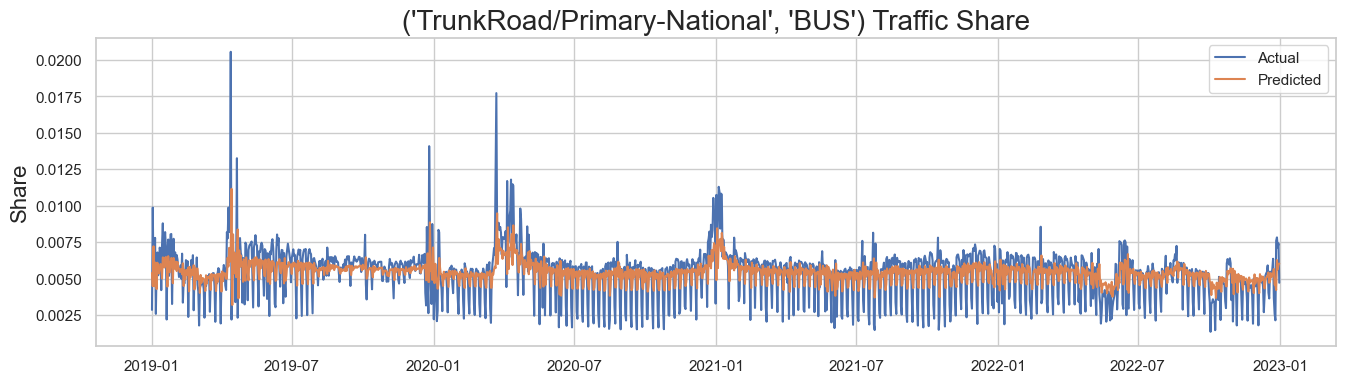

In [5]:
def fill_gaps(df, categories, value_column, arima_order=(2, 0, 2)): 
    """
    Takes a DataFrame, creates a complete date range for each category combination,
    merges with the original dataset, and fills missing values using ARIMA.

    :param df: The DataFrame to process.
    :param categories: List of column names to define unique category combinations.
    :param value_column: Name of the column containing the values for ARIMA.
    :param arima_order: Order of the ARIMA model.
    """
    
    df = df.reset_index()
    # Creating a date range from 2019-01-01 to 2022-12-31
    date_range = pd.date_range(start='2019-01-01', end='2022-12-31')

    # Create a template DataFrame with all combinations of categories and date
    unique_categories = [df[category].unique() for category in categories]
    all_combinations = product(*unique_categories, date_range)
    template_df = pd.DataFrame(all_combinations, columns=categories + ['date'])

    # Ensure 'date' column in df is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Merge the template DataFrame with the original DataFrame
    merged_df = template_df.merge(df, on=categories + ['date'], how='left')

    # Fill missing values with ARIMA for each category combination
    for category_values in product(*unique_categories):
        filter_condition = np.logical_and.reduce([merged_df[cat] == val for cat, val in zip(categories, category_values)])
        train_set = merged_df.loc[filter_condition].copy()
        first_non_nan = train_set[value_column].first_valid_index()

        if first_non_nan is not None:
            train_set.loc[first_non_nan:, value_column].fillna(method='ffill', inplace=True)  # Forward fill
            train_set.set_index('date', inplace=True)
            train_set = train_set.asfreq(pd.infer_freq(train_set.index))

            arima = ARIMA(train_set[value_column], order=arima_order)
            predictions = arima.fit().predict()

            train_set[value_column].fillna(predictions, inplace=True)
            merged_df.loc[filter_condition, value_column] = train_set[value_column].values
            
        print(train_set)
        plt.figure(figsize=(16, 4))
        plt.plot(train_set.index, train_set[value_column], label="Actual")
        plt.plot(predictions, label="Predicted")
        plt.title(f"{category_values} Traffic Share", fontsize=20)
        plt.ylabel('Share', fontsize=16)
        plt.legend()
        plt.show()

    return merged_df


# For annual_cycle_counts
cycle_categories = ['road_type']  # Modify as per your dataset columns
cycle_value_column = 'daily_value'  # Modify as per your dataset
annual_cycles_counts_filled = fill_gaps(annual_cycles_counts, cycle_categories, cycle_value_column)

# Assume vehicle_share_counts and annual_cycle_counts are already loaded as DataFrames
vehicle_categories = ['road_type', 'vehicle_class']
vehicle_value_column = 0
vehicle_share_counts_filled = fill_gaps(vehicle_share_counts, vehicle_categories, vehicle_value_column)
